# 1. BAM-file

### Install IGV-notebook

In [ ]:
!pip install igv-notebook

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.5/302.5 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.2 MB/s eta 0:00:00


### Download the files

In [ ]:
!wget -O sample.bam "https://docs.google.com/uc?export=download&id=1EHtUHuISclLHKXGhjmn9pDKHYhSPc0uu&confirm=t"
!wget -O sample.bai "https://docs.google.com/uc?export=download&id=1alekgB02xKtUSI_X6Y2DfjK1BvzYIWfe&confirm=t"

--2024-03-10 13:34:40--  https://docs.google.com/uc?export=download&id=1EHtUHuISclLHKXGhjmn9pDKHYhSPc0uu&confirm=t
Resolving docs.google.com (docs.google.com)... 172.253.123.139, 172.253.123.138, 172.253.123.100, ...
Connecting to docs.google.com (docs.google.com)|172.253.123.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1EHtUHuISclLHKXGhjmn9pDKHYhSPc0uu&export=download [following]
--2024-03-10 13:34:40--  https://drive.usercontent.google.com/download?id=1EHtUHuISclLHKXGhjmn9pDKHYhSPc0uu&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.218.132, 2607:f8b0:400c:c14::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.218.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2428 (2.4K) [text/html]
Saving to: ‘sample.bam’

sample.bam          100%[===================>]   2.37K  --.-KB/s    in 0s  

### Let's have a look at the .bam

In [ ]:
import igv_notebook

igv_notebook.init()

b = igv_notebook.Browser(
    {
        "genome": "hg38",
        "locus": "chr17"
    }
)


b.load_track(
    {
        "name": "Local BAM",
        "path": "/content/sample.bam",
        "indexPath": "/content/sample.bai",
        "format": "bam",
        "type": "alignment"
    })


b.zoom_in()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 1.1 Find reads mapped on the TP53 gene [5]

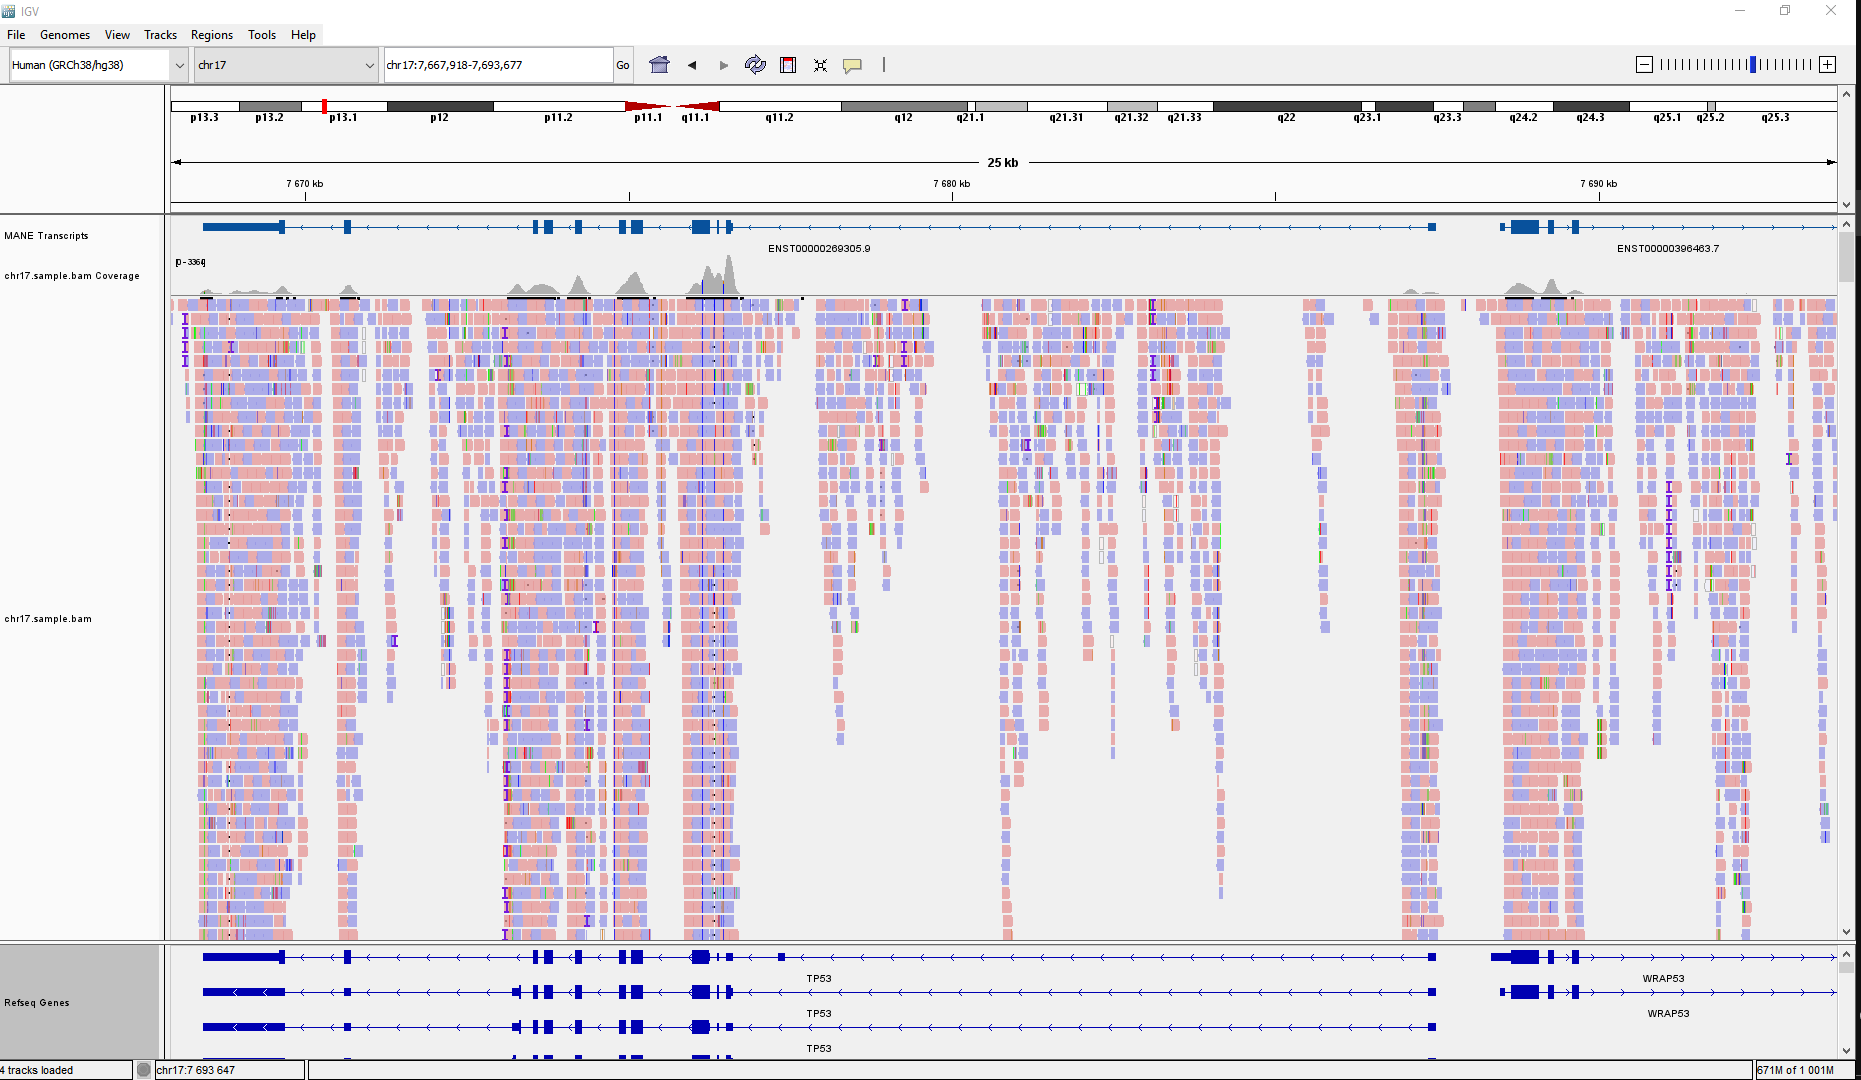

## 1.2 Speculate about the drastic difference in coverages of different parts of the TP53 gene [6]

The picture shows that the coverage is greater in the exon regions. This may be explained by the fact that the file contains the results of exome sequencing.



## 1.3 View reads as pairs [5]

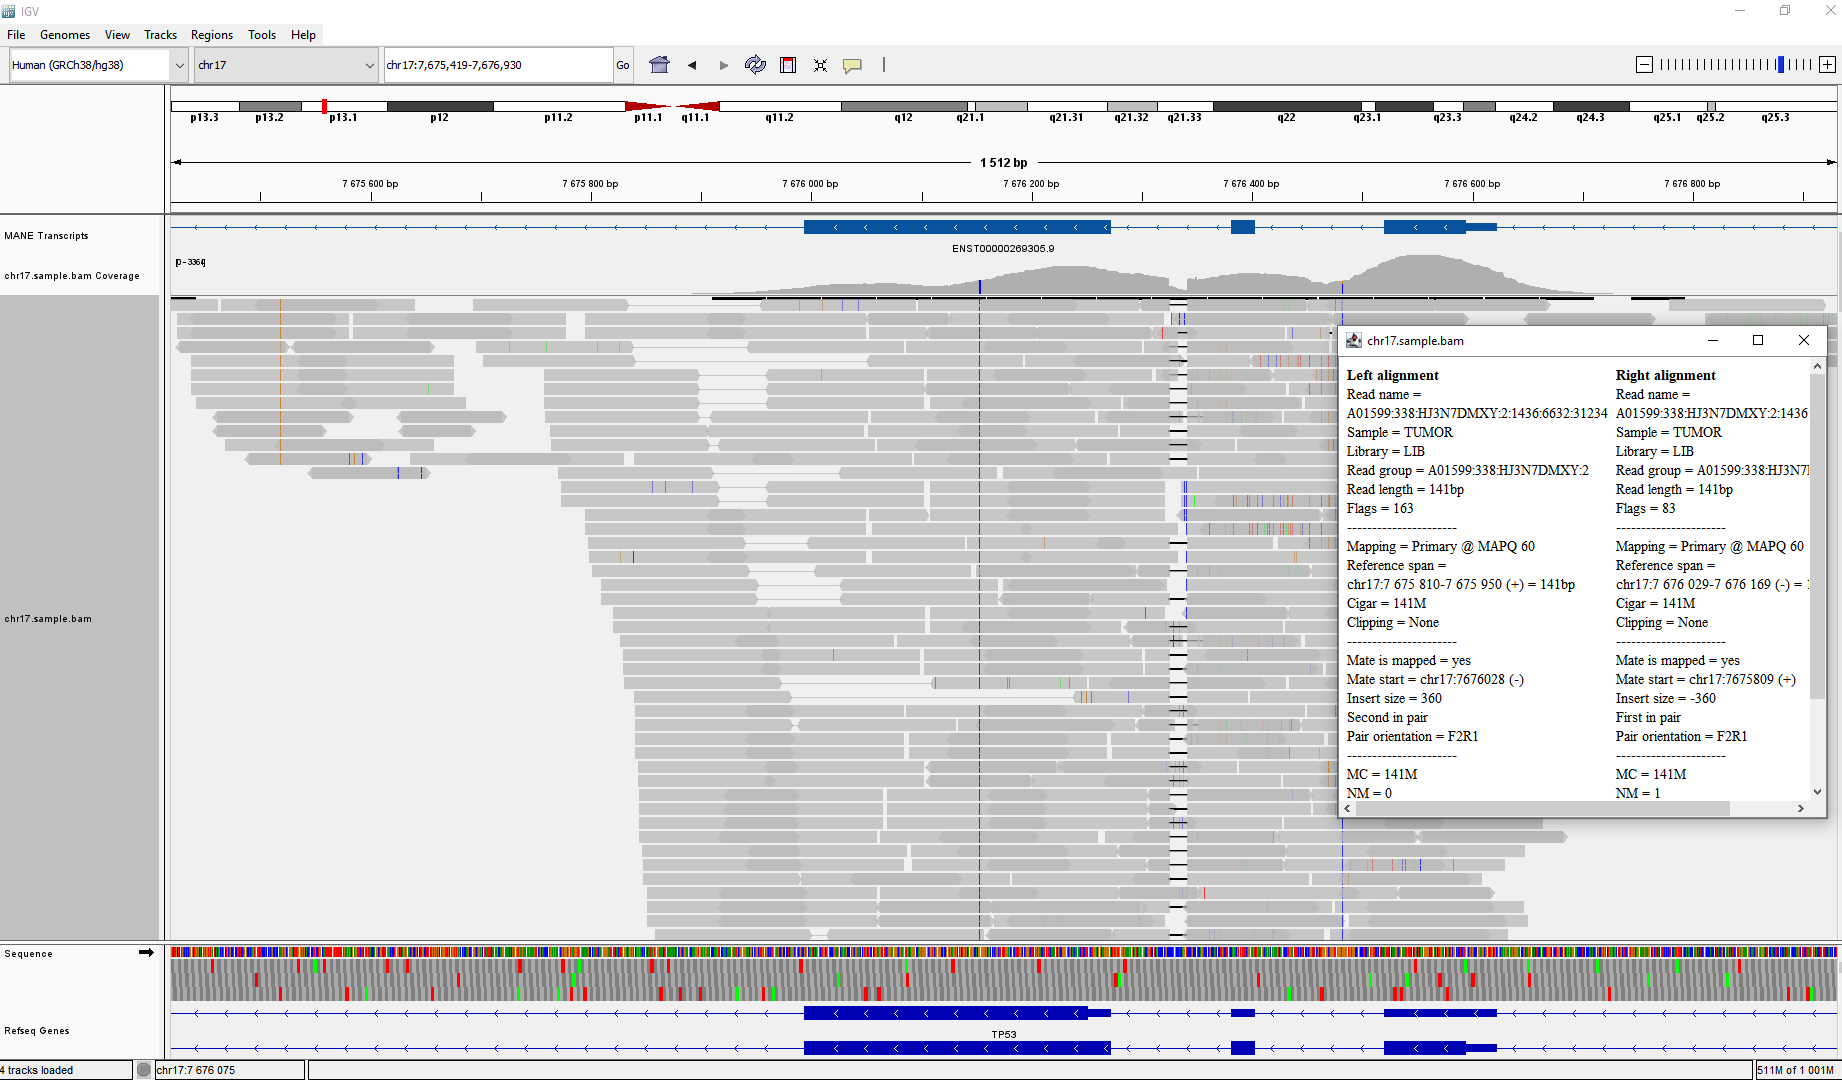

## 1.4 Explain what do you see with the default color settings (by pair orientation & insert size) [10]

A small number of paired red-stained reads can be seen. The manual says that pairs are marked in red if the distance between their reads was greater than expected. However, such reads are in the minority here.

## 1.5 Find a position with a potentional germline variant [10]

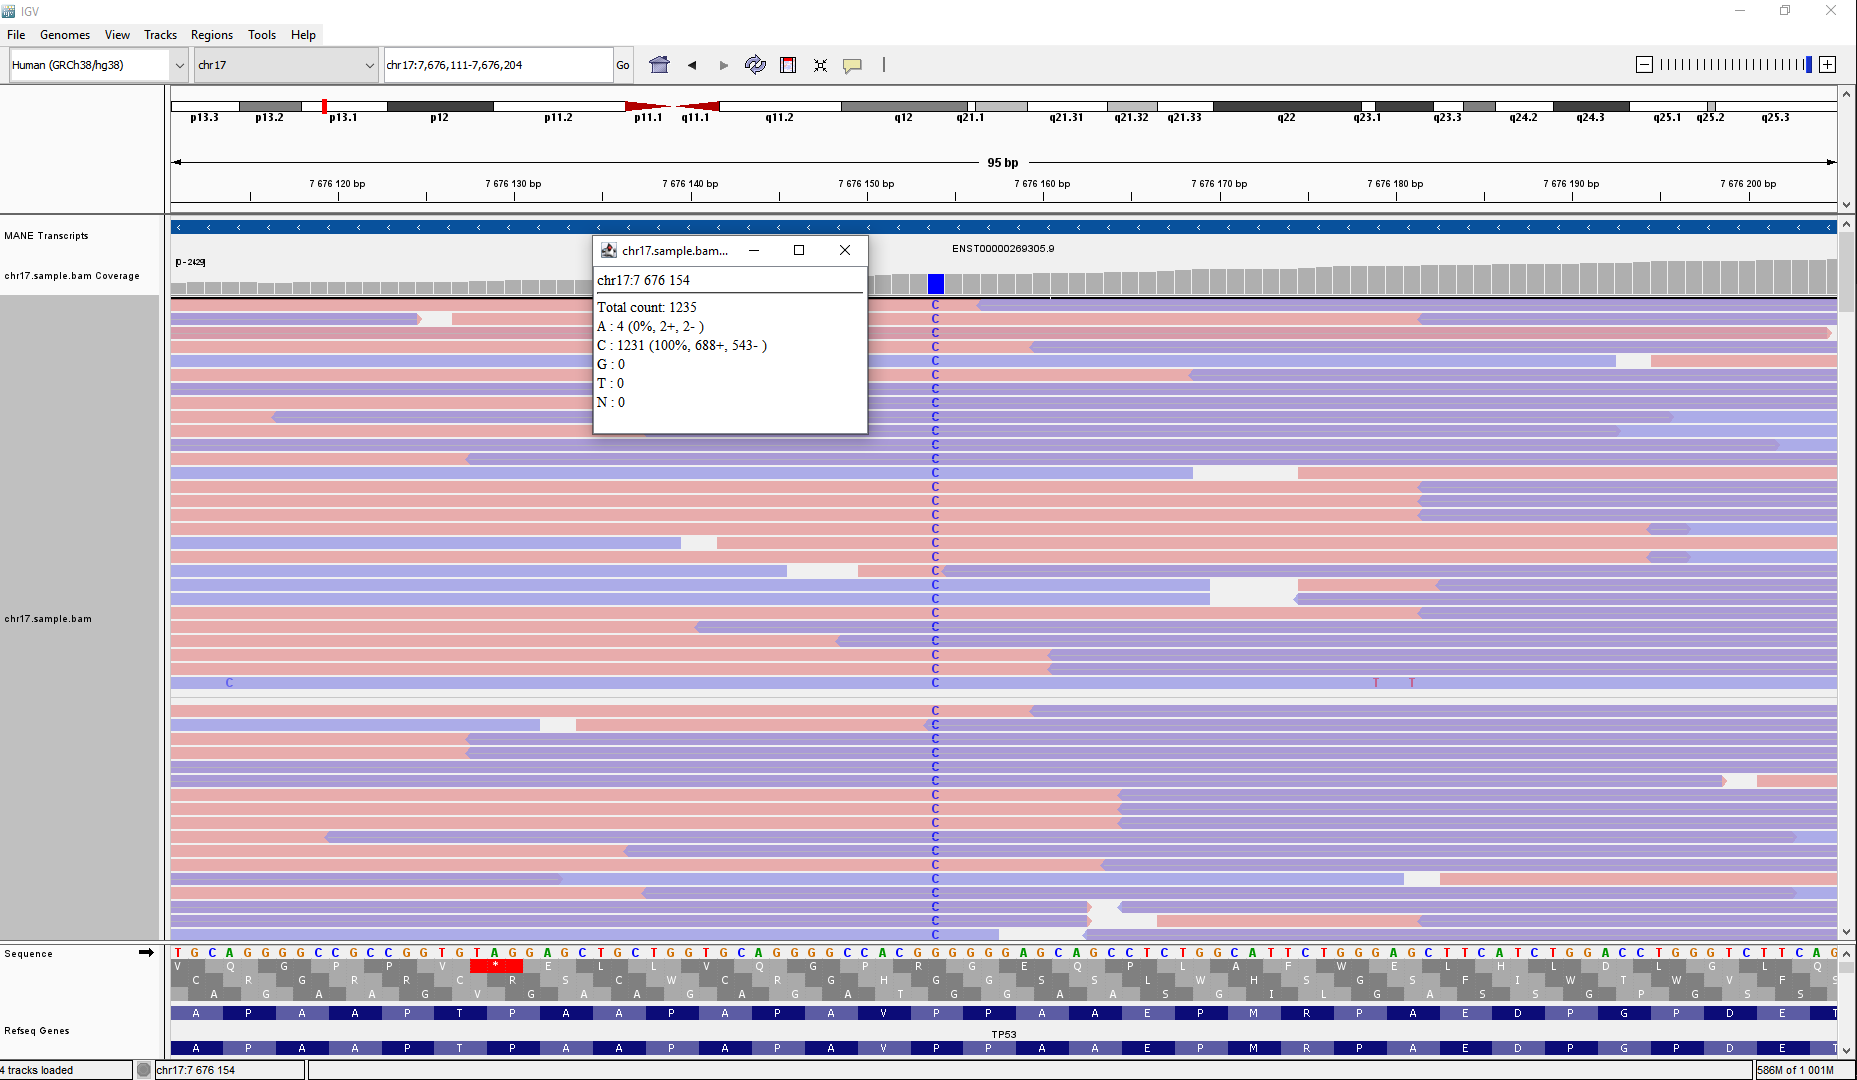

The variant on the screenshot may be germline since the nucleotide substitution is present in almost 100% of the reads.


# 2. Variant calling

### Install bcftools with conda

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2024-03-10 13:24:24--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   185MB/s    in 0.4s    

2024-03-10 13:24:25 (185 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h

In [ ]:
!conda install -c bioconda samtools bcftools

Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / failed with initial frozen solve. Retrying with flexible solve.
Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ 

### Make sure that everything is set up properly

In [ ]:
!bcftools --help


Program: bcftools (Tools for variant calling and manipulating VCFs and BCFs)
License: GNU GPLv3+, due to use of the GNU Scientific Library
Version: 1.10.2 (using htslib 1.10.2)

Usage:   bcftools [--version|--version-only] [--help] <command> <argument>

Commands:

 -- Indexing
    index        index VCF/BCF files

 -- VCF/BCF manipulation
    annotate     annotate and edit VCF/BCF files
    concat       concatenate VCF/BCF files from the same set of samples
    convert      convert VCF/BCF files to different formats and back
    isec         intersections of VCF/BCF files
    merge        merge VCF/BCF files files from non-overlapping sample sets
    norm         left-align and normalize indels
    plugin       user-defined plugins
    query        transform VCF/BCF into user-defined formats
    reheader     modify VCF/BCF header, change sample names
    sort         sort VCF/BCF file
    view         VCF/BCF conversion, view, subset and filter VCF/BCF files

 -- VCF/BCF analysis
    

### Download hg38

In [ ]:
!wget http://hgdownload.soe.ucsc.edu/goldenPath/hg38/bigZips/hg38.fa.gz
!gunzip hg38.fa.gz

--2024-03-10 13:26:37--  http://hgdownload.soe.ucsc.edu/goldenPath/hg38/bigZips/hg38.fa.gz
Resolving hgdownload.soe.ucsc.edu (hgdownload.soe.ucsc.edu)... 128.114.198.53
Connecting to hgdownload.soe.ucsc.edu (hgdownload.soe.ucsc.edu)|128.114.198.53|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 983659424 (938M) [application/x-gzip]
Saving to: ‘hg38.fa.gz’

hg38.fa.gz          100%[===================>] 938.09M  38.7MB/s    in 22s     

2024-03-10 13:26:59 (41.7 MB/s) - ‘hg38.fa.gz’ saved [983659424/983659424]



## 2.1 Extract TP53 gene from the sample.bam file [6]

In [ ]:
# Insert your code here
# hg38 TP53 coordinats are chr17:7,668,421-7,687,490. So i will extract intervals
!samtools quickcheck -v sample.bam

sample.bam was not identified as sequence data.
sample.bam


In [ ]:
# It seems like .bam file is somehow corrupted. So i will download the file manually.
!samtools quickcheck -v chr17.sample.bam


In [ ]:
!samtools view -h chr17.sample.bam | awk '{FS="\t";OFS="\t"} $1~"^@"||$4>=7668421&&$4<=7687490' > tp53.sam

In [ ]:
!samtools view -b tp53.sam > tp53.bam

In [ ]:
# Don't forget to index your new .bam-file
!samtools index tp53.bam tp53.bai

## 2.2 Perform variant calling within TP53 gene [1]

In [ ]:
!bcftools mpileup --max-depth 10000 -Ou -f hg38.fa tp53.bam | bcftools call -mv -Ov -o calls.vcf

Note: none of --samples-file, --ploidy or --ploidy-file given, assuming all sites are diploid
[mpileup] 1 samples in 1 input files
[mpileup] maximum number of reads per input file set to -d 10000


### Read vcf with pandas

In [ ]:
import pandas as pd


pd.options.display.max_rows = 100
df = pd.read_table('calls.vcf', comment='#', header=None)
df.columns = ['CHROM',	'POS',	'ID',	'REF',	'ALT',	'QUAL',	'FILTER',	'INFO',	'FORMAT',	'TUMOR']
df

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,TUMOR
0,chr17,7668450,.,G,A,222.00000,.,DP=120;VDB=2.69178e-20;SGB=-0.693147;RPB=0.101...,GT:PL,"0/1:255,0,255"
1,chr17,7669952,.,G,A,9.78026,.,DP=35;VDB=0.02;SGB=-0.453602;RPB=0.5;MQB=1;MQS...,GT:PL,"0/1:46,0,255"
2,chr17,7672182,.,A,G,22.15260,.,DP=28;VDB=0.02;SGB=-0.453602;RPB=0.285714;MQB=...,GT:PL,"0/1:58,0,255"
3,chr17,7672205,.,C,T,25.51080,.,DP=24;VDB=0.02;SGB=-0.453602;RPB=0.307692;MQB=...,GT:PL,"0/1:61,0,255"
4,chr17,7672218,.,T,C,28.74160,.,DP=23;VDB=0.02;SGB=-0.453602;RPB=0.333333;MQB=...,GT:PL,"0/1:64,0,255"
5,chr17,7672219,.,G,A,28.74160,.,DP=23;VDB=0.02;SGB=-0.453602;RPB=0.333333;MQB=...,GT:PL,"0/1:64,0,255"
6,chr17,7672246,.,T,C,225.00000,.,DP=14;VDB=0.10512;SGB=-0.651104;MQSB=0.600535;...,GT:PL,"1/1:255,24,0"
7,chr17,7672502,.,G,A,30.40970,.,DP=17;VDB=0.8;SGB=-0.453602;RPB=0.785714;MQB=1...,GT:PL,"0/1:65,0,253"
8,chr17,7674645,.,C,G,4.55923,.,DP=42;VDB=0.02;SGB=-0.453602;RPB=0.909091;MQB=...,GT:PL,"0/1:40,0,255"
9,chr17,7674797,.,T,C,225.00000,.,DP=76;VDB=3.41671e-08;SGB=-0.693147;MQ0F=0;AC=...,GT:PL,"1/1:255,178,0"


## 2.3 Describe what you see. [10]

***Your answer goes here***

There are 40 potential mutations in this dataset. Most of them are SNPs, but several indels are also presented.

## 2.4 Read about any 5 parameters from the INFO field and write an explanation what do they mean. [10]

In [ ]:
df.at[0, 'INFO']

'DP=120;VDB=2.69178e-20;SGB=-0.693147;RPB=0.101944;MQB=1;MQSB=1;BQB=0.722372;MQ0F=0;ICB=1;HOB=0.5;AC=1;AN=2;DP4=27,7,30,20;MQ=60'

***Your answer goes here***

AC - Allele count in genotypes, for each ALT allele, in the same order as listed

AN - Total number of alleles in called genotypes

DP - Combined depth across samples (Raw read depth) The combined depth across samples (INFO/DP) is simply the sum of the read depth (i.e., the genotype depth (FORMAT/DP) fields) over all samples.

MQ - RMS mapping quality (Average mapping quality) The Root Mean Square (RMS) mapping quality (MQ) of reads across all samples provides an estimation of the overall mapping quality to support a variant call. It includes the standard deviation (SD) of the mapping qualities, where a low SD indicates values close to the mean. Good mapping qualities are around MQ 60. GATK recommends hard filtering of variants with MQ less than 40.

VDB - Variant Distance Bias for filtering splice-site artefacts in RNA-seq data (bigger is better)



## 2.5 Draw distributions of DP and MQ parameters from the INFO field. [10]

In [ ]:
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# re.search("DP=(\d+);.*MQ=(\d+)",i).groups()
dp = []
mq = []
for i in df["INFO"]:
  group = re.search("DP=(\d+);.*MQ=(\d+)",i).groups()
  dp.append(int(group[0]))
  mq.append(int(group[1]))

df2 = pd.DataFrame(list(zip(dp,mq)), columns=["DP","MQ"])

<Axes: xlabel='MQ', ylabel='Density'>

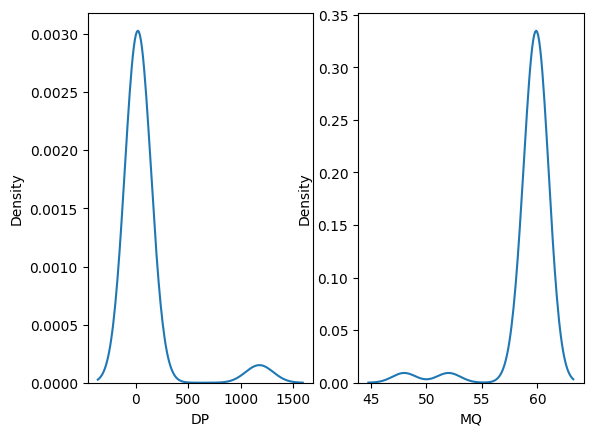

In [ ]:
fig, axs = plt.subplots(ncols=2)
sns.kdeplot(df2["DP"],ax=axs[0])
sns.kdeplot(df2["MQ"],ax=axs[1])


In [ ]:
import math

In [ ]:
df2["DP"].mean()

76.8

## 2.6 Propose thresholds for the parameters from the task 2.5 and perform variant filtering using them. Write an explanation for these thresholds. How many variants were filtered out? [25]

In [ ]:

!bcftools view -e 'MQ < 40 || DP < 20' calls.vcf > calls_filterd.vcf

In [ ]:
pd.options.display.max_rows = 100
df3 = pd.read_table('calls_filterd.vcf', comment='#', header=None)
df3.columns = ['CHROM',	'POS',	'ID',	'REF',	'ALT',	'QUAL',	'FILTER',	'INFO',	'FORMAT',	'TUMOR']
df3

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,TUMOR
0,chr17,7668450,.,G,A,222.00000,.,DP=120;VDB=2.69178e-20;SGB=-0.693147;RPB=0.101...,GT:PL,"0/1:255,0,255"
1,chr17,7669952,.,G,A,9.78026,.,DP=35;VDB=0.02;SGB=-0.453602;RPB=0.5;MQB=1;MQS...,GT:PL,"0/1:46,0,255"
2,chr17,7672182,.,A,G,22.15260,.,DP=28;VDB=0.02;SGB=-0.453602;RPB=0.285714;MQB=...,GT:PL,"0/1:58,0,255"
3,chr17,7672205,.,C,T,25.51080,.,DP=24;VDB=0.02;SGB=-0.453602;RPB=0.307692;MQB=...,GT:PL,"0/1:61,0,255"
4,chr17,7672218,.,T,C,28.74160,.,DP=23;VDB=0.02;SGB=-0.453602;RPB=0.333333;MQB=...,GT:PL,"0/1:64,0,255"
5,chr17,7672219,.,G,A,28.74160,.,DP=23;VDB=0.02;SGB=-0.453602;RPB=0.333333;MQB=...,GT:PL,"0/1:64,0,255"
6,chr17,7674645,.,C,G,4.55923,.,DP=42;VDB=0.02;SGB=-0.453602;RPB=0.909091;MQB=...,GT:PL,"0/1:40,0,255"
7,chr17,7674797,.,T,C,225.00000,.,DP=76;VDB=3.41671e-08;SGB=-0.693147;MQ0F=0;AC=...,GT:PL,"1/1:255,178,0"
8,chr17,7675327,.,C,T,176.00000,.,DP=55;VDB=0.0254108;SGB=-0.693147;MQ0F=0;AC=2;...,GT:PL,"1/1:206,148,0"
9,chr17,7675519,.,A,G,225.00000,.,DP=20;VDB=0.00679693;SGB=-0.680642;MQ0F=0;AC=2...,GT:PL,"1/1:255,36,0"


***Your answer goes here***

Threshold for MQ will be >=40, as GATK recommend this value for hard filtering.

As for DP, i could not find any advices from reliable sources. However, it is believed that x20 coverage is sufficient for calling germinal variants. So the threshold will be >=20.

27 variants were filtered out.

## 2.6 Were you able to find the variant from the task 1.5? [2]

***Your answer goes here***

YES. This is it: chr17	7676154	.	G	C

\

___